# Import Packages and Classifiers

In [1]:
#!pip install --user scikit-learn

In [2]:
#!pip install --user matplotlib

In [3]:
#!pip install --user pandas

In [4]:
#!pip install --user numpy

In [5]:
#!pip install --user seaborn

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
import time

from sklearn.model_selection import learning_curve
import pandas as pd 
import numpy as np  
from sklearn import tree


https://scikit-learn.org/stable/modules/cross_validation.html

# Import Data 

In [42]:
hr_data = pd.read_csv("hr_data.csv")
bank_data = pd.read_csv("bank-marketing.csv")

# First Dataset 
https://www.kaggle.com/dhirajnirne/bank-marketing

## Prep Data for Modeling 

In [43]:
bank_data.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [44]:
categorical_cols = ['age group', 'eligible', 'job', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome']

for i in categorical_cols: 
    le = preprocessing.LabelEncoder()
    le.fit(bank_data[i].unique())
    bank_data[i] = le.transform(bank_data[i])

In [45]:
target = 'response'
cols = ['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

#splitn into training and testing data sets
train, test = train_test_split(bank_data, test_size=0.3, random_state = 30)

In [46]:
train_sizes = np.arange(1, len(train), 1500).tolist()#.append(len(train))
train_sizes.append(len(train)-1)


## Trees
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

### Pruning Curves

In [47]:
alphas = np.linspace(0,.02, num = 50)

accuracy_train, accuracy_test = [], []
accuracy_train_gradient, accuracy_test_gradient = [], []
max_score = 0 
max_score_alpha = 0

max_score_gradient = 0
max_score_alpha_gradient = 0
for i in alphas:
    
    gradient = GradientBoostingClassifier(ccp_alpha = i)
    
    gradient.fit(train[cols], train[target])
    y_train_pred = gradient.predict(train[cols])
    y_test_pred = gradient.predict(test[cols])
    
    accuracy_train_gradient.append(accuracy_score(train[target], y_train_pred))
    accuracy_test_gradient.append(accuracy_score(test[target], y_test_pred))
    
    #use the alpha that has the max score on the test set
    max_score_alpha_gradient = i if max_score_gradient < accuracy_score(test[target], y_test_pred) else max_score_alpha_gradient  
    max_score_gradient = accuracy_score(test[target], y_test_pred) if max_score_gradient < accuracy_score(test[target], y_test_pred) else max_score_gradient 
    
    
    
    decision_tree = DecisionTreeClassifier(ccp_alpha = i)
    
    decision_tree.fit(train[cols], train[target])
    y_train_pred = decision_tree.predict(train[cols])
    y_test_pred = decision_tree.predict(test[cols])
    
    accuracy_train.append(accuracy_score(train[target], y_train_pred))
    accuracy_test.append(accuracy_score(test[target], y_test_pred))
    
    #use the alpha that has the max score on the test set
    max_score_alpha = i if max_score < accuracy_score(test[target], y_test_pred) else max_score_alpha  
    max_score = accuracy_score(test[target], y_test_pred) if max_score < accuracy_score(test[target], y_test_pred) else max_score  



<AxesSubplot:title={'center':'Pruning Alpha by Accuracy'}, xlabel='Alpha', ylabel='Accuracy'>

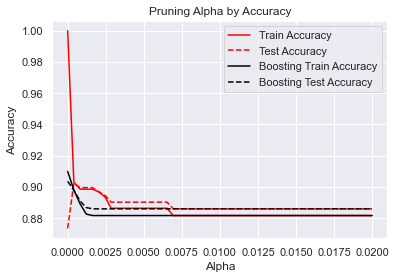

In [48]:
sns.set()
sns.lineplot(y = accuracy_train, x = alphas, color='red', label = "Train Accuracy").set(xlabel='Alpha', ylabel='Accuracy')
sns.lineplot(y = accuracy_test, x = alphas, color='red', linestyle="dashed", label = "Test Accuracy").set(title='Pruning Alpha by Accuracy')

sns.lineplot(y = accuracy_train_gradient, x = alphas,color='black', label = "Boosting Train Accuracy")
sns.lineplot(y = accuracy_test_gradient, x = alphas, color='black',linestyle="dashed", label = "Boosting Test Accuracy")

### Tree Learning Curves

In [49]:
test_accuracy2 = []
train_accuracy2 = []

test_accuracy = []
train_accuracy = []
for i in train_sizes:
    train_data_subset2 = train.head(i)
    classifier2  = DecisionTreeClassifier(random_state=0, ccp_alpha=max_score_alpha)
    classifier2.fit(train_data_subset2[cols], train_data_subset2[target])
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy2.append(accuracy_score(train_data_subset2[target], classifier2.predict(train_data_subset2[cols])))
    test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))

    if i > 1: 
        train_data_subset = train.head(i)
        classifier  = GradientBoostingClassifier(random_state=0, ccp_alpha=max_score_alpha)
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))



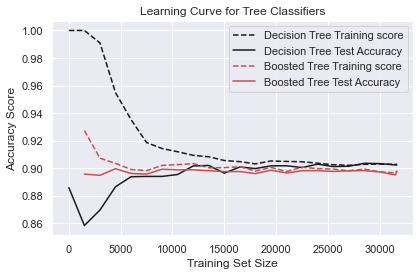

In [50]:
plt.plot(train_sizes, train_accuracy2, '--', color = 'k', label="Decision Tree Training score")
plt.plot(train_sizes, test_accuracy2, color = 'k', label="Decision Tree Test Accuracy")
plt.plot(train_sizes[1:], train_accuracy, '--', color = 'r', label="Boosted Tree Training score")
plt.plot(train_sizes[1:], test_accuracy,color = 'r', label="Boosted Tree Test Accuracy")


plt.title("Learning Curve for Tree Classifiers")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Decision Tree Metrics

In [51]:
start_time = time.time()
no_prune_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
no_prune_tree.fit(train[cols], train[target])
no_prune_tree_runtime = time.time() - start_time
no_prune_tree_training_error = 1 - accuracy_score(train[target], no_prune_tree.predict(train[cols]))
no_prune_tree_error = 1 - accuracy_score(test[target], no_prune_tree.predict(test[cols]))

In [52]:
start_time = time.time()
final_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=max_score_alpha)
final_tree.fit(train[cols], train[target])
final_tree_runtime = time.time() - start_time
final_tree_training_error = 1 - accuracy_score(train[target], final_tree.predict(train[cols]))
final_tree_error = 1 - accuracy_score(test[target], final_tree.predict(test[cols]))

In [53]:
plt.figure(figsize=(200, 200), dpi=100)
tree.plot_tree(final_tree)
plt.show()

In [54]:
max_score_alpha

0.00040816326530612246

In [55]:
print(no_prune_tree.tree_.node_count)
print(no_prune_tree.tree_.max_depth)


5115
30


In [56]:
print(final_tree.tree_.node_count)
print(final_tree.tree_.max_depth)

49
10


In [57]:
pd.DataFrame({
    'feature': cols,
    'importance': final_tree.feature_importances_
})

feature  importance
0                 age    0.032382
1           age group    0.000000
2            eligible    0.000000
3                 job    0.000000
4              salary    0.000000
5             marital    0.000000
6           education    0.000000
7   marital-education    0.000000
8            targeted    0.000000
9             default    0.000000
10            balance    0.000000
11            housing    0.044753
12               loan    0.000000
13            contact    0.033809
14                day    0.000000
15              month    0.134059
16           duration    0.531518
17           campaign    0.000000
18              pdays    0.077364
19           previous    0.000000
20           poutcome    0.146114

In [58]:
final_tree_row = pd.DataFrame(['Decision Tree', final_tree_training_error, final_tree_error, accuracy_score(test[target], final_tree.predict(test[cols])), final_tree_runtime] ).T

In [59]:
bad_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=.1)
bad_tree.fit(train[cols], train[target])
print(bad_tree.tree_.node_count)
print(bad_tree.tree_.max_depth )

1
0


### Gradient Boosted Tree metrics 


In [60]:
start_time = time.time()
gbc = GradientBoostingClassifier(random_state=0, ccp_alpha=max_score_alpha_gradient)
gbc.fit(train[cols], train[target])
gbc_runtime = time.time() - start_time
gbc_training_error = 1 - accuracy_score(train[target], gbc.predict(train[cols]))
gbc_error = 1 - accuracy_score(test[target], gbc.predict(test[cols]))

gbc_row = pd.DataFrame(['Gradient Boosting Tree', gbc_training_error, gbc_error, accuracy_score(test[target], gbc.predict(test[cols])), gbc_runtime] ).T

In [61]:
min_node = 0
max_node = 0
for i in range(100):
    
    max_node = gbc.estimators_[i, 0].tree_.node_count if max_node < gbc.estimators_[i, 0].tree_.node_count else max_node
    min_node = gbc.estimators_[i, 0].tree_.node_count if min_node > gbc.estimators_[i, 0].tree_.node_count else min_node  
      

In [62]:
gbc.max_depth

3

In [63]:
print(min_node)
print(max_node)

0
15


## Neural Network
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [64]:
start_time = time.time()
nn = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(train[cols], train[target])
nn_runtime = time.time() - start_time 

nn_training_error = 1 - accuracy_score(train[target], nn.predict(train[cols]))
nn_error = 1 - accuracy_score(test[target], nn.predict(test[cols]))

nn_row = pd.DataFrame(['Neural Network', nn_training_error, nn_error, accuracy_score(test[target], nn.predict(test[cols])), nn_runtime] ).T

/Users/nicole/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicole/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(


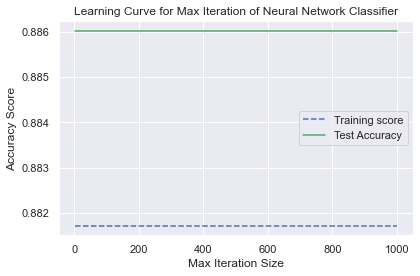

In [65]:
test_accuracy = []
train_accuracy = []
max_iter = np.linspace(1, 1001, num = 100 , dtype = int)
for i in max_iter:
    classifier  = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter = i)
    classifier.fit(train[cols], train[target].apply(lambda x: int()))
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(max_iter, train_accuracy, '--', color="b",  label="Training score")
plt.plot(max_iter, test_accuracy, color="g", label="Test Accuracy")
plt.title("Learning Curve for Max Iteration of Neural Network Classifier")
plt.xlabel("Max Iteration Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/Users/nicole/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


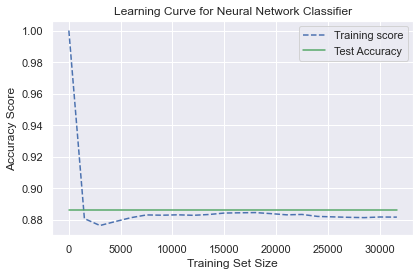

In [66]:
test_accuracy = []
train_accuracy = []
for i in train_sizes:
    train_data_subset = train.head(i)
    classifier  = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
    classifier.fit(train_data_subset[cols], train_data_subset[target])
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(train_sizes, train_accuracy, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_accuracy, color="g", label="Test Accuracy")

plt.title("Learning Curve for Neural Network Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Support Vector Machines 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [67]:
test_accuracy = []
train_accuracy = []

test_accuracy2 = []
train_accuracy2 = []
for i in train_sizes:
    if i > 1: 
        train_data_subset = train.head(i)
        classifier  = make_pipeline(StandardScaler(), SVC(kernel= 'linear'))
        classifier2 = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
        
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        classifier2.fit(train_data_subset[cols], train_data_subset[target])

        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

        train_accuracy2.append(accuracy_score(train_data_subset[target], classifier2.predict(train_data_subset[cols])))
        test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))



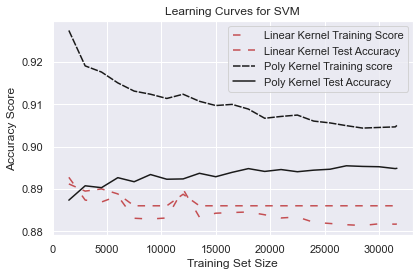

In [68]:
    
plt.plot(train_sizes[1:], train_accuracy, linestyle='--', color = 'r', dashes=(5, 10), label="Linear Kernel Training Score")
plt.plot(train_sizes[1:], test_accuracy, color = 'r', dashes=(5, 5), label="Linear Kernel Test Accuracy")

plt.plot(train_sizes[1:], train_accuracy2, linestyle='--', color = 'k', dashes=(5, 1), label="Poly Kernel Training score")
plt.plot(train_sizes[1:], test_accuracy2, color = 'k', label="Poly Kernel Test Accuracy")

plt.title("Learning Curves for SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Poly

In [ ]:
test_accuracy = []
train_accuracy = []

test_accuracy2 = []
train_accuracy2 = []
max_iter = np.linspace(1, 1001, num = 100)
for i in max_iter:
    classifier  = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
    classifier2 = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
    
    classifier.fit(train[cols], train[target])
    classifier2.fit(train[cols], train[target])
    
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    train_accuracy2.append(accuracy_score(train_data_subset[target], classifier2.predict(train_data_subset[cols])))
    test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))



In [ ]:
    
plt.plot(max_iter, train_accuracy, linestyle='--', color = 'r', dashes=(5, 10), label="Linear Kernel Training Score")
plt.plot(max_iter, test_accuracy, linestyle='--', color = 'r', dashes=(5, 5), label="Linear Kernel Test Accuracy")

plt.plot(max_iter, train_accuracy2, linestyle='--', dashes=(5, 1), label="Poly Kernel Training score")
plt.plot(max_iter, test_accuracy2, label="Poly Kernel Test Accuracy")

plt.title("Learning Curve for Max Iteration for SVM Classifier")
plt.xlabel("Max Iteration Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
start_time = time.time()

clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
clf.fit(train[cols], train[target])
clf_runtime = time.time() - start_time 

clf_training_error = 1 - accuracy_score(train[target], clf.predict(train[cols]))
clf_error = 1 - accuracy_score(test[target], clf.predict(test[cols]))

clf_row = pd.DataFrame(['Support Vector Machine', clf_training_error, clf_error, accuracy_score(test[target], clf.predict(test[cols])), clf_runtime] ).T

## K Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
from sklearn.model_selection import GridSearchCV
#https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 10))

# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = [{'n_neighbors': k_range,
         'weights': ['uniform', 'distance']}]

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(train[cols], train[target])

# plot the results
# this is identical to the one we generated above

distance_results = grid.cv_results_.get('mean_test_score')[1::2]
uniform_results = grid.cv_results_.get('mean_test_score')[::2]


plt.plot(k_range, distance_results, '--', color="b",  label="Distance Neighbor Weight")
plt.plot(k_range, uniform_results, color="g", label="Uniform Neighbor Weight")
plt.legend(loc="best")
plt.xlabel('Value of K Neighbors')
plt.ylabel('Cross-Validated Test Set Accuracy')
plt.title('Test Accuracy by Number of Neighbors')

In [ ]:
start_time = time.time()

neigh = KNeighborsClassifier(n_neighbors=grid.best_params_.get('n_neighbors'), weights = grid.best_params_.get('weights'))
neigh.fit(train[cols], train[target])
neigh_runtime = time.time() - start_time 

neigh_training_error = 1 - accuracy_score(train[target], neigh.predict(train[cols]))
neigh_error = 1 - accuracy_score(test[target], neigh.predict(test[cols]))

neigh_row = pd.DataFrame(['K Nearest Neighbor', neigh_training_error, neigh_error, accuracy_score(test[target], neigh.predict(test[cols])), neigh_runtime]).T 

In [ ]:
test_accuracy = []
train_accuracy = []
for i in train_sizes:
    if i > 1:
        train_data_subset = train.head(i)
        classifier  = KNeighborsClassifier(n_neighbors=grid.best_params_.get('n_neighbors'))
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(train_sizes[1:], train_accuracy, '--', color="b",  label="Training score")
plt.plot(train_sizes[1:], test_accuracy, color="g", label="Test Accuracy")

num_of_neighbors = grid.best_params_.get('n_neighbors')
neighbor_weight = "uniform" if grid.best_params_.get('weight') == "None" else grid.best_params_.get('weight')
plt.title(f"Learning Curve for KNN {num_of_neighbors} and {neighbor_weight} Neighbor Weight Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
final_df = neigh_row.append(clf_row).append(gbc_row).append(nn_row).append(final_tree_row)
final_df.columns = ['Classifier Name', 'Training Error', 'Testing Error', 'Accuracy', 'Training Time']
final_df

# Second Dataset   

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

## Prep Data for Modeling 

In [ ]:
hr_data.columns

In [ ]:
categorical_cols = ['city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

for i in categorical_cols: 
    le = preprocessing.LabelEncoder()
    le.fit(hr_data[i].unique())
    hr_data[i] = le.transform(hr_data[i])



In [ ]:
target = 'target'
cols = ['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']

#splitn into training and testing data sets
train, test = train_test_split(hr_data, test_size=0.3, random_state = 30)
train_sizes = np.arange(1, len(train), 1000).tolist()
train_sizes.append(len(train)-1)

## 2 Trees 

### Pruning 

In [ ]:
alphas = np.linspace(0,.02, num = 50)

accuracy_train, accuracy_test = [], []
accuracy_train_gradient, accuracy_test_gradient = [], []
max_score = 0 
max_score_alpha = 0

max_score_gradient = 0
max_score_alpha_gradient = 0
for i in alphas:
    
    gradient = GradientBoostingClassifier(ccp_alpha = i)
    
    gradient.fit(train[cols], train[target])
    y_train_pred = gradient.predict(train[cols])
    y_test_pred = gradient.predict(test[cols])
    
    accuracy_train_gradient.append(accuracy_score(train[target], y_train_pred))
    accuracy_test_gradient.append(accuracy_score(test[target], y_test_pred))
    
    #use the alpha that has the max score on the test set
    max_score_alpha_gradient = i if max_score_gradient < accuracy_score(test[target], y_test_pred) else max_score_alpha_gradient  
    max_score_gradient = accuracy_score(test[target], y_test_pred) if max_score_gradient < accuracy_score(test[target], y_test_pred) else max_score_gradient 
    
    
    
    decision_tree = DecisionTreeClassifier(ccp_alpha = i)
    
    decision_tree.fit(train[cols], train[target])
    y_train_pred = decision_tree.predict(train[cols])
    y_test_pred = decision_tree.predict(test[cols])
    
    accuracy_train.append(accuracy_score(train[target], y_train_pred))
    accuracy_test.append(accuracy_score(test[target], y_test_pred))
    
    #use the alpha that has the max score on the test set
    max_score_alpha = i if max_score < accuracy_score(test[target], y_test_pred) else max_score_alpha  
    max_score = accuracy_score(test[target], y_test_pred) if max_score < accuracy_score(test[target], y_test_pred) else max_score  



In [ ]:
sns.set()
sns.lineplot(y = accuracy_train, x = alphas, color='red', label = "Train Accuracy").set(xlabel='Alpha', ylabel='Accuracy')
sns.lineplot(y = accuracy_test, x = alphas, color='red', linestyle="dashed", label = "Test Accuracy").set(title='Pruning Alpha by Accuracy')

sns.lineplot(y = accuracy_train_gradient, x = alphas,color='black', label = "Boosting Train Accuracy")
sns.lineplot(y = accuracy_test_gradient, x = alphas, color='black',linestyle="dashed", label = "Boosting Test Accuracy")

### Tree Learning Curves


In [ ]:
test_accuracy2 = []
train_accuracy2 = []

test_accuracy = []
train_accuracy = []
for i in train_sizes:
    train_data_subset2 = train.head(i)
    classifier2  = DecisionTreeClassifier(random_state=0, ccp_alpha=max_score_alpha)
    classifier2.fit(train_data_subset2[cols], train_data_subset2[target])
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy2.append(accuracy_score(train_data_subset2[target], classifier2.predict(train_data_subset2[cols])))
    test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))

    if i > 1: 
        train_data_subset = train.head(i)
        classifier  = GradientBoostingClassifier(random_state=0, ccp_alpha=max_score_alpha)
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))



In [ ]:
plt.plot(train_sizes, train_accuracy2, '--', color = 'k', label="Decision Tree Training score")
plt.plot(train_sizes, test_accuracy2, color = 'k', label="Decision Tree Test Accuracy")
plt.plot(train_sizes[1:], train_accuracy, '--', color = 'r', label="Boosted Tree Training score")
plt.plot(train_sizes[1:], test_accuracy,color = 'r', label="Boosted Tree Test Accuracy")


plt.title("Learning Curve for Tree Classifiers")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Decision Tree Metrics

In [ ]:
no_prune_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0)
no_prune_tree.fit(train[cols], train[target])
no_prune_tree_runtime = time.time() - start_time
no_prune_tree_training_error = 1 - accuracy_score(train[target], no_prune_tree.predict(train[cols]))
no_prune_tree_error = 1 - accuracy_score(test[target], no_prune_tree.predict(test[cols]))

In [ ]:
start_time = time.time()
final_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=max_score_alpha)
final_tree.fit(train[cols], train[target])
final_tree_runtime = time.time() - start_time
final_tree_training_error = 1 - accuracy_score(train[target], final_tree.predict(train[cols]))
final_tree_error = 1 - accuracy_score(test[target], final_tree.predict(test[cols]))

In [ ]:
plt.figure(figsize=(200, 200), dpi=100)
tree.plot_tree(final_tree)
plt.show()

In [ ]:
max_score_alpha

In [ ]:
print(no_prune_tree.tree_.node_count)
print(no_prune_tree.tree_.max_depth)

In [ ]:
print(final_tree.tree_.node_count)
print(final_tree.tree_.max_depth)

In [ ]:
pd.DataFrame({
    'feature': cols,
    'importance': final_tree.feature_importances_
})

In [ ]:
final_tree_row = pd.DataFrame(['Decision Tree', final_tree_training_error, final_tree_error, accuracy_score(test[target], final_tree.predict(test[cols])), final_tree_runtime] ).T

In [ ]:
bad_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=.1)
bad_tree.fit(train[cols], train[target])
print(bad_tree.tree_.node_count)
print(bad_tree.tree_.max_depth )

### Gradient Boosted Tree metrics 

In [ ]:
start_time = time.time()
gbc = GradientBoostingClassifier(random_state=0, ccp_alpha=max_score_alpha_gradient)
gbc.fit(train[cols], train[target])
gbc_runtime = time.time() - start_time
gbc_training_error = 1 - accuracy_score(train[target], gbc.predict(train[cols]))
gbc_error = 1 - accuracy_score(test[target], gbc.predict(test[cols]))

gbc_row = pd.DataFrame(['Gradient Boosting Tree', gbc_training_error, gbc_error, accuracy_score(test[target], gbc.predict(test[cols])), gbc_runtime] ).T

In [ ]:
min_node = 0
max_node = 0
for i in range(100):
    
    max_node = gbc.estimators_[i, 0].tree_.node_count if max_node < gbc.estimators_[i, 0].tree_.node_count else max_node
    min_node = gbc.estimators_[i, 0].tree_.node_count if min_node > gbc.estimators_[i, 0].tree_.node_count else min_node  
      

In [ ]:
gbc.max_depth

In [ ]:
print(min_node)
print(max_node)

## Neural Network

In [ ]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(train[cols], train[target])
accuracy_score(test[target], nn.predict(test[cols]))

In [ ]:
start_time = time.time()
nn = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(train[cols], train[target])
nn_runtime = time.time() - start_time 

nn_training_error = 1 - accuracy_score(train[target], nn.predict(train[cols]))
nn_error = 1 - accuracy_score(test[target], nn.predict(test[cols]))

nn_row = pd.DataFrame(['Neural Network', nn_training_error, nn_error, accuracy_score(test[target], final_tree.predict(test[cols])), nn_runtime] ).T
print(accuracy_score(test[target], nn.predict(test[cols])))

In [ ]:
test_accuracy = []
train_accuracy = []
max_iter = np.linspace(1, 1001, num = 100)
for i in max_iter:
    classifier  = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1, max_iter = i)
    classifier.fit(train[cols], train[target])
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(max_iter, train_accuracy, '--', color="b",  label="Training score")
plt.plot(max_iter, test_accuracy, color="g", label="Test Accuracy")
plt.title("Learning Curve for Max Iteration of Neural Network Classifier")
plt.xlabel("Max Iteration Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
test_accuracy = []
train_accuracy = []
for i in train_sizes:
    train_data_subset = train.head(i)
    classifier  = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
    classifier.fit(train_data_subset[cols], train_data_subset[target])
    #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(train_sizes, train_accuracy, '--', color="b",  label="Training score")
plt.plot(train_sizes, test_accuracy, color="g", label="Test Accuracy")


plt.title("Learning Curve for Neural Network Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 2 Support Vector Machines 

In [ ]:
test_accuracy = []
train_accuracy = []

test_accuracy2 = []
train_accuracy2 = []
for i in train_sizes:
    if i > 1: 
        train_data_subset = train.head(i)
        classifier  = make_pipeline(StandardScaler(), SVC(kernel= 'linear'))
        classifier2 = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
        
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        classifier2.fit(train_data_subset[cols], train_data_subset[target])

        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

        train_accuracy2.append(accuracy_score(train_data_subset[target], classifier2.predict(train_data_subset[cols])))
        test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))



In [ ]:
    
plt.plot(train_sizes[1:], train_accuracy, linestyle='--', color = 'r', dashes=(5, 10), label="Linear Kernel Training Score")
plt.plot(train_sizes[1:], test_accuracy, color = 'r', dashes=(5, 5), label="Linear Kernel Test Accuracy")

plt.plot(train_sizes[1:], train_accuracy2, linestyle='--', color = 'k', dashes=(5, 1), label="Poly Kernel Training score")
plt.plot(train_sizes[1:], test_accuracy2, color = 'k', label="Poly Kernel Test Accuracy")

plt.title("Learning Curve for SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
test_accuracy = []
train_accuracy = []

test_accuracy2 = []
train_accuracy2 = []
max_iter = np.linspace(1, 1001, num = 100)
for i in max_iter:
    classifier  = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
    classifier2 = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
    
    classifier.fit(train[cols], train[target])
    classifier2.fit(train[cols], train[target])
    
    train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
    test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    train_accuracy2.append(accuracy_score(train_data_subset[target], classifier2.predict(train_data_subset[cols])))
    test_accuracy2.append(accuracy_score(test[target], classifier2.predict(test[cols])))



In [ ]:
    
plt.plot(max_iter, train_accuracy, linestyle='--', color = 'r', dashes=(5, 10), label="Linear Kernel Training Score")
plt.plot(max_iter, test_accuracy, linestyle='--', color = 'r', dashes=(5, 5), label="Linear Kernel Test Accuracy")

plt.plot(max_iter, train_accuracy2, linestyle='--', dashes=(5, 1), label="Poly Kernel Training score")
plt.plot(max_iter, test_accuracy2, label="Poly Kernel Test Accuracy")

plt.title("Learning Curve for Max Iteration for SVM Classifier")
plt.xlabel("Max Iteration Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
start_time = time.time()

clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
clf.fit(train[cols], train[target])
clf_runtime = time.time() - start_time 

clf_training_error = 1 - accuracy_score(train[target], clf.predict(train[cols]))
clf_error = 1 - accuracy_score(test[target], clf.predict(test[cols]))

clf_row = pd.DataFrame(['Support Vector Machine', clf_training_error, clf_error, accuracy_score(test[target], clf.predict(test[cols])), clf_runtime] ).T

## K Nearest Neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV
#https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 10))

# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = [{'n_neighbors': k_range,
         'weights': ['uniform', 'distance']}]

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(train[cols], train[target])

# plot the results
distance_results = grid.cv_results_.get('mean_test_score')[1::2]
uniform_results = grid.cv_results_.get('mean_test_score')[::2]

plt.plot(k_range, distance_results, '--', color="b",  label="Distance Neighbor Weight")
plt.plot(k_range, uniform_results, color="g", label="Uniform Neighbor Weight")
plt.legend(loc="best")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Test Set Accuracy')
plt.title('Test Accuracy by Number of Neighbors')

In [ ]:
print(grid.best_params_.get('n_neighbors'))

In [ ]:
start_time = time.time()

neigh = KNeighborsClassifier(n_neighbors=grid.best_params_.get('n_neighbors'))
neigh.fit(train[cols], train[target])
neigh_runtime = time.time() - start_time 

neigh_training_error = 1 - accuracy_score(train[target], neigh.predict(train[cols]))
neigh_error = 1 - accuracy_score(test[target], neigh.predict(test[cols]))

neigh_row = pd.DataFrame(['K Nearest Neighbor', neigh_training_error, neigh_error, accuracy_score(test[target], neigh.predict(test[cols])), neigh_runtime]).T 

In [ ]:
test_accuracy = []
train_accuracy = []
for i in train_sizes:
    if i > 1: 
        train_data_subset = train.head(i)
        classifier  = KNeighborsClassifier(n_neighbors=grid.best_params_.get('n_neighbors'))
        classifier.fit(train_data_subset[cols], train_data_subset[target])
        #print(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        train_accuracy.append(accuracy_score(train_data_subset[target], classifier.predict(train_data_subset[cols])))
        test_accuracy.append(accuracy_score(test[target], classifier.predict(test[cols])))

    
plt.plot(train_sizes[1:], train_accuracy, '--', color="b",  label="Training score")
plt.plot(train_sizes[1:], test_accuracy, color="g", label="Test Accuracy")

num_of_neighbors = grid.best_params_.get('n_neighbors')
neighbor_weight = "uniform" if grid.best_params_.get('weight') == "None" else grid.best_params_.get('weight')
plt.title(f"Learning Curve for KNN {num_of_neighbors} and {neighbor_weight} Neighbor Weight Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
final_df2 = neigh_row.append(clf_row).append(gbc_row).append(nn_row).append(final_tree_row)
final_df2.columns = ['Classifier Name', 'Training Error', 'Testing Error', 'Accuracy', 'Training Time']
final_df2